In [1]:
import pandas as pd
import numpy as np
import random
import seaborn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.utils import resample
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.model_selection import train_test_split

Ao obter o dataframe, vamos misturar as linhas para remover possíveis vícios (overfitting) do perceptron, por exemplo, caso todos os fraudulentos estivessem ao final do dataframe e etc.

In [2]:
df = pd.read_csv('C:/Users/tiago/Desktop/TIAGO/Tiago UnB/IEECIS/PS_2021/4_periodo/creditcard.csv')
df = df.sample(frac=1) # MISTURANDO O DATAFRAME, PARA REMOVER POSSÍVEIS VÍCIOS DO MODELO
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
199692,133087.0,-0.135399,1.321319,-0.309917,1.280499,0.995281,-1.157078,1.068632,-0.119151,-0.496538,...,-0.237196,-0.734112,0.063415,-0.319735,-0.728136,-0.828156,0.238037,0.259660,20.99,0
236421,148802.0,2.062522,0.187342,-1.684312,0.411217,0.484707,-0.795960,0.211559,-0.244744,0.404903,...,-0.349927,-0.870916,0.341571,0.524127,-0.257608,0.173284,-0.056020,-0.029341,2.99,0
52168,45307.0,1.478313,-1.151183,0.799279,-1.299073,-1.912182,-0.823866,-1.280409,-0.110223,-1.503906,...,-0.061300,0.186284,-0.002174,0.361211,0.315589,-0.102208,0.046034,0.027700,22.40,0
262441,160476.0,2.162162,-1.690429,0.097629,-1.382931,-2.061413,-0.429995,-1.708949,-0.056261,-0.654126,...,-0.118240,0.175214,0.299810,-0.034500,-0.531744,-0.249940,0.063971,-0.022266,52.00,0
104041,68890.0,1.354610,-0.430558,-0.183477,-0.903551,-0.326088,-0.383382,-0.257971,-0.043473,-1.326351,...,-0.084371,-0.408482,0.043524,-0.321883,0.377409,-0.418802,-0.014483,-0.005168,22.97,0


# Perceptron

O objetivo é construir um perceptron com camada oculta (multilayer perceptron) utilizando somente o numpy para classificar as observações em fraudulentas ou não. As variáveis se encontram sem nome porque foi feito um PCA para preservar as informações sigilosas dos clientes e todas as variáveis (features) do dataframe são válidas para a análise. Como as colunas estão transformadas pelo PCA, uma análise gráfica não seria muito informativa, logo, vamos pular diretamente para a construção do perceptron e divisão da base de dados.

Sabemos que o Perceptron segue um modelo matemático de aprendizagem que inclui: 

1. Inputs com os valores do dataframe
2. Processamento dos valores dos inputs pelos neurônios artificiais (na camada oculta e na camada de output)
3. Cada valor de input passa por um cálculo linear diferente dentro de cada neurônio. Que segue o modelo: 
                            Y2 = Fa*(w1*input + b)
onde b é o bias (utilizado para equilibrar o resultado) e Fa a função de ativação, que serve para impedir que o cálculo linear do input atinja zero na sua derivada, o que impossibilitaria o aprendizado do neurônio, e w1 o peso que foi dado ao input, e são inicializados aleatoriamente para depois serem corrigidos
4. O resultado do output chega até a última camada, o qual classificaria, no nosso caso, em fraudulento ou não, de acordo com qual neurônio tiver mais ativação (existe um neurônio na camada de saída para cada possível classificação que existe no dataframe, no nosso caso, existem somente dois, e o com maior pontuação é a classificação adotada)

Para a função de ativação do nosso perceptron, adotaremos a função Degrau

In [3]:
x = 0 
ativation = {(lambda x: 1/(1 + np.exp(-x)))}
deriv = {(lambda x: x*(1-x))}

activation_tang = {(lambda x: np.tanh(x))}
deriv_tang = {(lambda x: 1-x**2)}

activation_ReLU = {(lambda x: x*(x > 0))}
deriv_ReLU = {(lambda x: 1 * (x>0))}

Agora, construiremos o Perceptron multicamada, lembrando que o algoritmo de 'backpropagation', que é o que possibilita o aprendizado da máquina ao calcular o erro a partir do resultado esperado e o obtido. Assim ele pode atualizar os pesos dos inputs e seus bias. 

Lembrando que os pesos e bias devem ser inicializados aleatoriamente, para quebrar a uniformidade dos neurônios no aprendizado

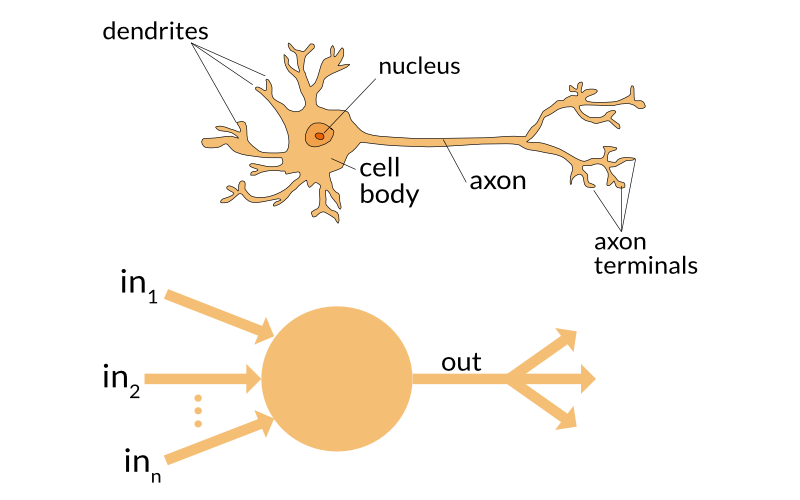

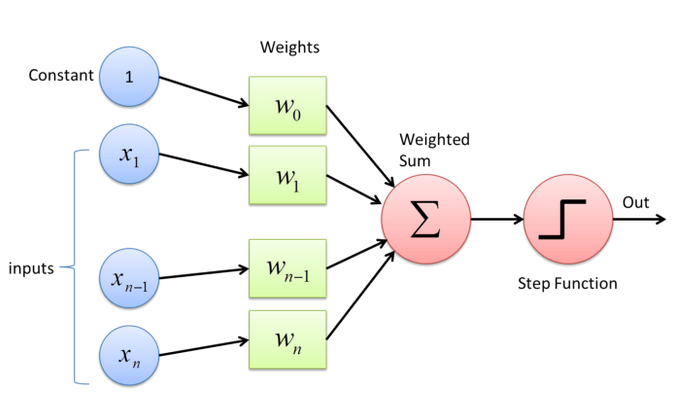

Agora, a regra de aprendizado do perceptron é dada pela atualização dos pesos e dos bias, como já dito anteriormente, agora mostraremos a fórmula matematica do aprendizado:

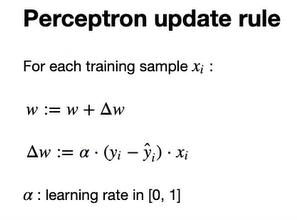

O seguinte código é uma tentativa da construção de um Perceptron Multiclasse "do zero", utilizando somente o pacote Numpy.

In [146]:
class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 30                        # Camada de Input
            self.hiddenLayer = 1                       # Camadas Ocultas
            self.OutputLayer = 2                       # Camadas de Output
            self.learningRate = 0.005                  # Taxa de aprendizado
            self.max_epochs = 600                      # Épocas
            self.BiasHiddenValue = -1                   # Bias das Camadas Ocultas
            self.BiasOutputValue = -1                  # Bias da Camada de Output
            self.activation = self.ativacao['sigmoid'] # Função de Ativação
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        'Iniciando pesos e bias aleatoriamente'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
            'Step': (lambda x: np.where(x >= 0, 1, 0))
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0)),
            'Step': (lambda x: 0)
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Fase 1 - Erro: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Fase 2 - Atualizando pesos da OutputLayer e HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Fase 3 - Erro: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Fase 4 - Atualizando pesos da HiddenLayer e InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
 #   def show_err_graphic(self,v_erro,v_epoca):
 #       plt.figure(figsize=(9,4))
 #       plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
 #       plt.xlabel("Number of Epochs")
 #       plt.ylabel("Squared error (MSE) ");
 #       plt.title("Error Minimization")
 #       plt.show()

#    def predict(self, X, y):
#        'Retorna a predição pra cada valor de X'
#        my_predictions = []
#        'Algoritmo Forward'
#       forward = self.activation(np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden)
#        forward = self.activation(np.matmul(forward, self.WEIGHT_output) + self.BIAS_output)
#                                 
#        for i in forward:
#            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
#            
#        array_score = []
#        
#        for i in range(len(my_predictions)):
#            if my_predictions[i] == 0: 
#                array_score.append([i, 'Não fraudulento', my_predictions[i], y[i]])
#            elif my_predictions[i] == 1:
#                 array_score.append([i, 'Fraudulento', my_predictions[i], y[i]])
#                    
#        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
#        return my_predictions, dataframe
    
    def predict(self, X, y):
#        'Retorna a predição pra cada valor de X'
        my_predictions = []
#       'Algoritmo Forward'
        for i in range(len(X)):
#            forward = self.activation(np.matmul(X[i],self.WEIGHT_hidden) + self.BIAS_hidden)
#            forward = self.activation(np.matmul(forward, self.WEIGHT_output) + self.BIAS_output)
            forward = np.matmul(X[i],self.WEIGHT_hidden) + self.BIAS_hidden
# por algum motivo, a funcao de ativacao estava deixando todas as observacoes identicas
            forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
            my_predictions.append(forward)
            
        for i in range(len(my_predictions)):
            if my_predictions[i][1] >= 0.5:
                my_predictions[i] = 0
            else:
                my_predictions[i] = 1
                                 
#        for i in forward:
#           my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        array_score = []
        
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0: 
                array_score.append([i, 'Não fraudulento', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, 'Fraudulento', my_predictions[i], y[i]])
                    
        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    
#    def predict(self, X, y):
#        my_predictions = []
#        for i in range(len(X)):
#            y_predicted = self.activation(np.dot(X[i], self.WEIGHT_hidden) + self.BIAS_hidden)
#            y_predicted = self.activation(np.dot(y_predicted, self.WEIGHT_output) + self.BIAS_output)
#            my_predictions.append(y_predicted)
#            
#        array_score = []
#        
#        for i in range(len(my_predictions)):
#            if my_predictions[i] == 0: 
#                array_score.append(['Não fraudulento', my_predictions[i], y[i]])
#            else:
#                 array_score.append(['Fraudulento', my_predictions[i], y[i]])
                    
#        dataframe = pd.DataFrame(array_score, columns=['class', 'output', 'hoped_output'])
#        return my_predictions, dataframe
        #return my_predictions
        #return y_predicted

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                'Fase 1 - (Algoritmo Forward)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Fase 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0]) #Class1 {1,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1]) #Class2 {0,1}
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Atualização de pesos'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 10 == 0)or(count_epoch == 1)):
                print("Época ", count_epoch, "- Erro Total: ",total_error) #, f'\n Acurácia: {round((1-total_error)*100,2)}%
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
#        self.show_err_graphic(error_array,epoch_array)
        
#        plt.plot(W0[0])
#        plt.title('Weight Hidden update during training')
#        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
#        plt.ylabel('Value Weight')
#        plt.show()
        
#        plt.plot(W1[0])
#        plt.title('Weight Output update during training')
#        plt.legend(['neuron1', 'neuron2', 'neuron3'])
#        plt.ylabel('Value Weight')
#        plt.show()

        return self

Por conta da incerteza causada pelo algoritmo de predição do Perceptron Multicamada, também foi montado o algoritmo do Perceptron de camada única para meios de comparação ao Perceptron Multilayer, além de plotada somente o erro e a acurácia durante o treino.  Segue o código:

In [5]:
class SingleLayerPerceptron:
    def __init__(self, taxa_aprendizado=0.01, n_iteracoes=1000):
        self.lr = taxa_aprendizado
        self.n_iteracoes = n_iteracoes
        self.func_ativacao = self.funcao_degrau
        self.pesos = None
        self.bias = None

    def fit(self, x, y):
        n_obs, n_variaveis = x.shape

        # parametros de inicializacao
        self.pesos = np.zeros(n_variaveis)
        #self.pesos = [[random.random() - 1 for i in range(n_obs)] for j in range(n_obs)]
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iteracoes):

            for idx, x_i in enumerate(x):

                linear_output = np.dot(x_i, self.pesos) + self.bias
                y_predicted = self.func_ativacao(linear_output)

                # regra de aprendizado
                update = self.lr * (y_[idx] - y_predicted)

                self.pesos += update * x_i
                self.bias += update

    def predict(self, x):
        linear_output = np.dot(x, self.pesos) + self.bias
        y_predicted = self.func_ativacao(linear_output)
        return y_predicted
    
    # para o algoritmo, utilizaremos a função Degrau
    def funcao_degrau(self, Xi):
        return np.where(Xi >= 0, 1, 0)

# Manipulação:

Agora, vamos equilibrar os valores das observações do dataframe com relação à variável que queremos classificar



In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

A partir daqui, seguiremos com o undersampling e depois, repetiremos o código para o dataframe com oversampling


In [7]:
df_0 = df[df.Class==0]
df_1 = df[df.Class==1]

df_0 = resample(df_0, replace = False, n_samples = 492)

df_u = pd.concat([df_1,df_0])

df_u = df_u.sample(frac=1)

df_u.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

Para o treinamento do perceptron, seria bom um grande volume de dados, então vamos criar outro dataframe para, em vez de utilizar o método de undersampling, utilizar o oversampling e depois compararemos os resultados. Segue o oversampling:

In [8]:
from imblearn.over_sampling import RandomOverSampler 

In [9]:
df_0 = df[df.Class==0]
df_1 = df[df.Class==1]

df_0 = resample(df_0, replace = False, n_samples = 19000)

df_o = pd.concat([df_1,df_0])

x = df_o.drop(columns='Class')
y = df_o.Class

df_o = df_o.sample(frac=1)

df_o.Class.value_counts()

0    19000
1      492
Name: Class, dtype: int64

In [10]:
oversample = RandomOverSampler(sampling_strategy='minority')

x_over, y_over = oversample.fit_resample(x, y)

x_over['Class'] = y_over

df_o = x_over

df_o = df_o.sample(frac=1)

df_o.Class.value_counts()

0    19000
1    19000
Name: Class, dtype: int64

Agora, separaremos o dataframe em *treino* e *teste*. Utilizaremos 25% para teste e 75% para treino:

In [11]:
random.seed(14) #9500 para teste e 28500 para treino no oversample, 247 e 739 no undersampling

#train_u = df_u[0:739]
#test_u = df_u[739:986]
#train_o = df_o[0:28500]
#test_o = df_o[28500:38000]

y = df_o.Class
x = df_o.drop(columns='Class')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle = True)

In [12]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# Testando:

Antes de testarmos o modelo, primeiramente dividimos o dataset que testaremos em treino (para o perceptron atualizar seus pesos) e depois em teste (para vermos como é dada a acurácia do perceptron). Selecionaremos quantos % do banco de dados será para treino e quantos para teste.

Dentro dos parâmetros do Perceptron, escolheremos a taxa de aprendizado do modelo (o quanto cada erro de cada neurônio vai afetar a alteração de seus pesos e bias), além do número de bachs (em quantas vezes o banco de treino será dividido e passado pelo Perceptron)

Duas hipóteses formuladas nesse relatório foram se as técnicas de Oversampling e Undersampling afetariam os dados de alguma forma, veremos isso a seguir. É esperado que o algoritmo performe melhor com o Oversampling do que com o Undersampling

## Oversampling:

In [37]:
p = SingleLayerPerceptron(taxa_aprendizado=0.01, n_iteracoes=1000)

p.fit(x_train, y_train)

predictions = p.predict(x_test)

In [42]:
def acuracia(y_true, y_pred):
    acuracia = np.sum(y_true == y_pred) / len(y_true)
    return acuracia

print("Acurácia do Perceptron com o DataSet c/ Oversampling", round(acuracia(y_test, predictions)*100,2),'%')

Acurácia do Perceptron com o DataSet c/ Oversampling 57.09 %


## Undersampling:

In [66]:
y = df_u.Class
x = df_u.drop(columns='Class')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle = True)

In [67]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [45]:
p = SingleLayerPerceptron(taxa_aprendizado=0.01, n_iteracoes=1000)

p.fit(x_train, y_train)

predictions = p.predict(x_test)

In [47]:
print("Acurácia do Perceptron com o DataSet c/ Undersampling", round(acuracia(y_test, predictions)*100,2),'%')

Acurácia do Perceptron com o DataSet c/ Undersampling 54.07 %


Após análise das acurácias dos dois resultados, viu-se que as técnicas de Undersampling e Oversampling não fazem diferença significativa para o resultado do modelo, ainda que a técnica de Oversampling trouxe um incremento de 3%

# Treinamento do modelo de formas diferentes:

## Tentativa do MultiLayerPerceptron

Um erro que aparecia logo após o erro total das épocas se mantia aparecendo, mesmo pós diversas tentativas e revisagem de código. Isso causou uma confusão e acredita-se que o código ainda está errado, então ocultei as mensagens de erro, mas mantive o que obtivemos de resultado, mesmo que não seja confiável, é algo ainda a se comparar. Segue:

In [147]:
dic = {'InputLayer':30, 'HiddenLayer':1, 'OutputLayer':2,
              'Epocas':20, 'LearningRate':0.01,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(x_train,y_train)

import warnings
warnings.filterwarnings('ignore')

Época  1 - Erro Total:  0.04547335066716717
Época  10 - Erro Total:  0.03773804788192968
Época  20 - Erro Total:  0.03773804788192968


In [148]:
df = Perceptron.predict(x_test,y_test)[1]

df

,_id,class,output,hoped_output
0,0,Não fraudulento,0,0
1,1,Não fraudulento,0,0
2,2,Não fraudulento,0,0
3,3,Não fraudulento,0,1
4,4,Não fraudulento,0,1
...,...,...,...,...
241,241,Não fraudulento,0,0
242,242,Não fraudulento,0,1
243,243,Não fraudulento,0,0
244,244,Não fraudulento,0,0


In [149]:
df['class'].value_counts()

Não fraudulento    246
Name: class, dtype: int64

In [150]:
pd.crosstab(df.output,df.hoped_output)

hoped_output,0,1
output,,
0,122,124


Como imaginado, o modelo está bem overfittado, não categorizando nenhuma observação como fraudulenta.

## Testando com o banco normalizado:

Agora, após os resultados acima, decidiu-se utilizar o banco com oversampling, porém uma porção menor dele, para conservar tempo de execução de código, além de também normalizar o dataset

In [17]:
for i in df_o.columns:
  df_o[i] = (df_o[i] - df_o[i].min()) / (df_o[i].max() - df_o[i].min())

df_o = df_o.sample(frac=.1) # MISTURANDO O DATAFRAME, PARA REMOVER POSSÍVEIS VÍCIOS DO MODELO
print(df_o.shape)
df_o.head()

(380, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
16437,0.420490,0.900625,0.538011,0.927176,0.207181,0.573799,0.509517,0.827944,0.677329,0.613414,...,0.453119,0.486350,0.701567,0.785952,0.591124,0.473362,0.668609,0.466467,0.000000,0.0
19635,0.043170,0.949776,0.563208,0.743659,0.518706,0.536456,0.481814,0.743927,0.689713,0.606090,...,0.467741,0.521570,0.723516,0.591423,0.388163,0.402959,0.711542,0.465064,0.000467,1.0
9348,0.729648,0.990590,0.517373,0.837244,0.304580,0.601407,0.533585,0.826843,0.666484,0.640230,...,0.451305,0.483973,0.707905,0.787111,0.632050,0.401109,0.651024,0.448900,0.009341,0.0
27080,0.306365,0.933999,0.543012,0.867286,0.531827,0.538637,0.579770,0.763187,0.686362,0.573527,...,0.465332,0.535216,0.694188,0.775930,0.726135,0.374057,0.714620,0.491967,0.000355,1.0
10735,0.802318,0.986181,0.496568,0.880542,0.288990,0.564886,0.581992,0.805424,0.673402,0.706246,...,0.460649,0.559113,0.704438,0.833395,0.615785,0.357958,0.657376,0.449121,0.026487,0.0


In [18]:
y = df_o.Class
x = df_o.drop(columns='Class')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle = True)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [85]:
p = SingleLayerPerceptron(taxa_aprendizado=0.01, n_iteracoes=1000)

p.fit(x_train, y_train)

predictions = p.predict(x_test)

In [86]:
print("Acurácia do Perceptron com o DataSet Normalizado", round(acuracia(y_test, predictions)*100,2),'%')

Acurácia do Perceptron com o DataSet Normalizado 91.89 %


Viu-se que é necessário normalizar o banco de dados antes que sejam levados ao Perceptron, já que houve um incremento de quase 40% de acurácia do Perceptron com camada única

In [20]:
dic = {'InputLayer':30, 'HiddenLayer':1, 'OutputLayer':2,
              'Epocas':50, 'LearningRate':0.005,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(x_train,y_train)
warnings.filterwarnings('ignore')

Época  1 - Erro Total:  0.05957295340267128 
 Acurácia: 94.04%
Época  10 - Erro Total:  0.040464962945471014 
 Acurácia: 95.95%
Época  20 - Erro Total:  0.039049925368632804 
 Acurácia: 96.1%
Época  30 - Erro Total:  0.03848287264486386 
 Acurácia: 96.15%
Época  40 - Erro Total:  0.03818271651443781 
 Acurácia: 96.18%
Época  50 - Erro Total:  0.03799868787371242 
 Acurácia: 96.2%


No perceptron com múltiplas camadas, houve um incremento de 1% na acurácia (além de um maior crescimento entre as épocas), o que em certos modelos, é um incremento muito importante, principalmente em detecção de fraudulações. 

# Treinamento com diferentes learning rates, número de iterações e épocas

Para sanar dúvidas sobre os conceitos explicados a seguir, vamos introduzir uma imagem e conversar sobre os termos apresentados nela.

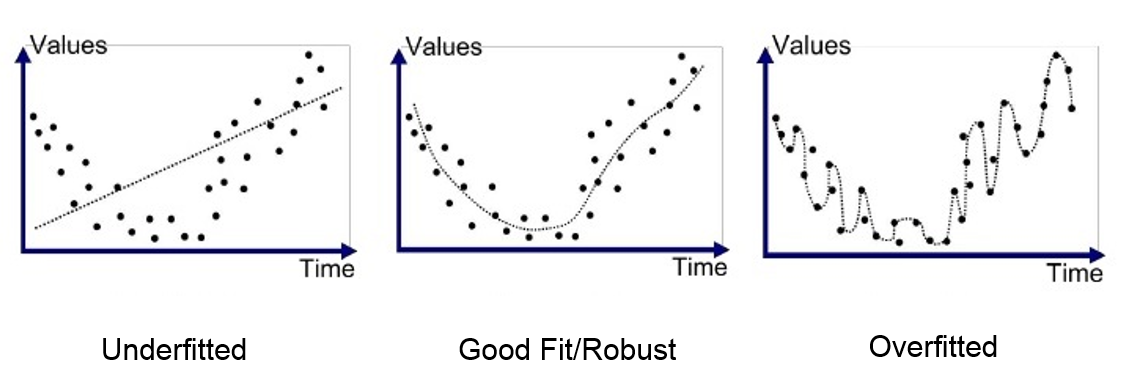

- Quando ocorre um *Underfit* em um modelo, quer dizer que a relação das variáveis explicativas montada para predizer a variável resposta não foi muito adequada, ou seja, seu modelo não conseguiu explicar bem a relação das variáveis

- Quando o modelo é um *Good Fit / Robust*, ele conseguiu relacionar bem as variáveis e predizer bem as observações do banco de teste sem que se tornasse viciado nos dados, é um modelo ideal para utilizar em futuras observações.

- Um modelo chamado de *Overfittado* é um modelo que "viciou" nos dados obtidos, ou seja, aprendeu demais com as variáveis e acabou decorando o que fazer com os dados obtidos, ao decorar os dados e saber exatamente o que aconteceria, ele não performaria bem em novas observações fora das que treinou e validou.

In [57]:
def acuracia(y_true, y_pred):
    acuracia = np.sum(y_true == y_pred) / len(y_true)
    return acuracia

In [21]:
# 1
dic = {'InputLayer':30, 'HiddenLayer':1, 'OutputLayer':2,
              'Epocas':10, 'LearningRate':0.85,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(x_train,y_train)
warnings.filterwarnings('ignore')

Época  1 - Erro Total:  0.045635670265087566 
 Acurácia: 95.44%
Época  10 - Erro Total:  0.04464951532288276 
 Acurácia: 95.54%


In [22]:
# 2
dic = {'InputLayer':30, 'HiddenLayer':1, 'OutputLayer':2,
              'Epocas':10, 'LearningRate':0.0000001,'BiasHiddenValue':-1, 
              'BiasOutputValue':-1, 'ActivationFunction':'tanh'}

Perceptron = MultiLayerPerceptron(dic)
Perceptron.fit(x_train,y_train)
warnings.filterwarnings('ignore')

Época  1 - Erro Total:  0.19999386890057017 
 Acurácia: 80.0%
Época  10 - Erro Total:  0.20020873654292984 
 Acurácia: 79.98%


Na situação #1, observa-se um overfitting, onde o Perceptron se adapta muito ao modelo e não condiz muito com a realidade, como se estivesse "decorando" as respostas, e na situação #2, ocorreu um underfitting, onde o modelo pouco se adaptou e explica a relação entre as variáveis.

In [55]:
# 3
p = SingleLayerPerceptron(taxa_aprendizado=0.9, n_iteracoes=100)

p.fit(x_train, y_train)

predictions = p.predict(x_test)

print("Acurácia do Perceptron com o DataSet Normalizado", round(acuracia(y_test, predictions)*100,2),'%')

Acurácia do Perceptron com o DataSet Normalizado 94.95 %


In [56]:
# 4
p = SingleLayerPerceptron(taxa_aprendizado=0.99, n_iteracoes=2)

p.fit(x_train, y_train)

predictions = p.predict(x_test)

print("Acurácia do Perceptron com o DataSet Normalizado", round(acuracia(y_test, predictions)*100,2),'%')

Acurácia do Perceptron com o DataSet Normalizado 87.37 %


Percebe-se que no número 4 ocorreu um leve Underfitting, onde o modelo não se ajustou muito bem aos dados, já número 3, acredita-se ter acontecido um leve Overfitting